In [9]:
import re
from matplotlib import pyplot as pt

MSG = re.compile(r'D[0-9]+-[0-9]+.*')

def find_last(lines):
    for l in lines[-1::]:
        if len(l.split())>1:
            return l

def duration(l0,l1):
    start = float(l0.split()[0])
    stop = float(l1.split()[0])
    return stop - start

def get_windows(lines):
    events = []
    for l in lines:
        if l =='' or 'count' in l:
            continue
        ls = l.split()
        if len(ls)<2:
            continue
        e = (float(ls[0]),ls[1])
        events.append(e)
    w0 = None
    
    windows = []
    w = []
    for e in events:
        if w0 == None:
            w0 = e
            w.append(w0)
            continue
        if w0 != None:
            if e[0] - w0[0] < 1:
                w.append(e)
            else:
                windows.append(w.copy())
                w = []
                w0 = e
                w.append(w0)

    return events,windows



def computePrx(windows):
    hist = {}
    for w in windows:
        c = 0
        for e in w:
            if MSG.match(e[1]):
                c+=1
        try:
            hist[c] += 1
        except:
            hist[c] = 1
    return hist


In [14]:
f = open('res-1.txt')
lines = f.readlines()
f.close()
f2 = open('res-2.txt')
lines2 = f2.readlines()
f2.close()

In [15]:
e,w = get_windows(lines)
d = duration(lines[0],find_last(lines))
e2,w2 = get_windows(lines2)
print(find_last(lines2))
d2 = duration(lines2[0],find_last(lines2))

3891.1403171	>


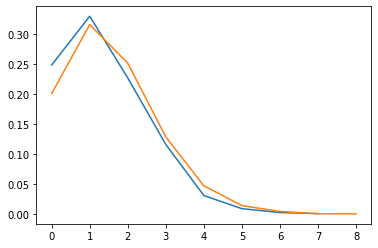

In [16]:
h = computePrx(w)
x = []
y = []

for c in sorted(h):
    x.append(c)
    y.append(h[c]/d)
    
h2 = computePrx(w2)
x2 = []
y2 = []

for c in sorted(h2):
    x2.append(c)
    y2.append(h2[c]/d2)

pt.plot(x,y)
pt.plot(x2,y2)
pt.show()